# Income Analysis

In [134]:
%matplotlib notebook

In [135]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [136]:
income_file = "cleaned_income_df.csv"
starter_df = pd.read_csv(income_file)
starter_df.head()

,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
0,AL,Mobile County,Chickasaw,City,36611,30.771450,-88.079697,38773,30506,33101
1,AL,Barbour County,Louisville,City,36048,31.708516,-85.611039,37725,19528,43789
2,AL,Shelby County,Columbiana,City,35051,33.191452,-86.615618,54606,31930,57348
3,AL,Mobile County,Satsuma,City,36572,30.874343,-88.009442,63919,52814,47707
4,AL,Mobile County,Dauphin Island,Town,36528,30.250913,-88.171268,77948,67225,54270


In [137]:
#combining cities with different spellings
income_df = starter_df.replace({"CARY":"Cary", "Winston Salem":"Winston-Salem", "Winston-salem":"Winston-Salem"})
income_df.head()


,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
0,AL,Mobile County,Chickasaw,City,36611,30.771450,-88.079697,38773,30506,33101
1,AL,Barbour County,Louisville,City,36048,31.708516,-85.611039,37725,19528,43789
2,AL,Shelby County,Columbiana,City,35051,33.191452,-86.615618,54606,31930,57348
3,AL,Mobile County,Satsuma,City,36572,30.874343,-88.009442,63919,52814,47707
4,AL,Mobile County,Dauphin Island,Town,36528,30.250913,-88.171268,77948,67225,54270


# Grouped by States

In [138]:
#Group by states
state_group_df = income_df.groupby(['State_ab'])
state_group_df.head()

,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
0,AL,Mobile County,Chickasaw,City,36611,30.771450,-88.079697,38773,30506,33101
1,AL,Barbour County,Louisville,City,36048,31.708516,-85.611039,37725,19528,43789
2,AL,Shelby County,Columbiana,City,35051,33.191452,-86.615618,54606,31930,57348
3,AL,Mobile County,Satsuma,City,36572,30.874343,-88.009442,63919,52814,47707
4,AL,Mobile County,Dauphin Island,Town,36528,30.250913,-88.171268,77948,67225,54270
...,...,...,...,...,...,...,...,...,...,...
31839,PR,Aibonito Municipio,Aibonito,Urban,705,18.139723,-66.265701,22653,15565,20498
31840,PR,Humacao Municipio,Humacao,Community,791,18.160142,-65.783104,19482,12540,18574
31841,PR,Las Piedras Municipio,Las Piedras,Community,771,18.200145,-65.843879,19621,10757,20549
31842,PR,Toa Baja Municipio,Toa Baja,Community,951,18.422877,-66.238312,18816,14583,16280


In [139]:
#Average of Mean and Median Incomes
mean_mean = state_group_df["Mean"].mean()
mean_median = state_group_df["Median"].mean()


In [140]:
#combine into new Dataframe
mean_summary_df = pd.DataFrame({
                                "Mean Income": mean_mean,
                                "Median Income": mean_median})

mean_summary_df.head()

,Mean Income,Median Income
State_ab,,
AK,79178.368932,111026.485437
AL,54023.752874,63252.247126
AR,52213.932153,52536.123894
AZ,63400.114943,80416.218391
CA,78654.297115,101260.922038


<IPython.core.display.Javascript object>


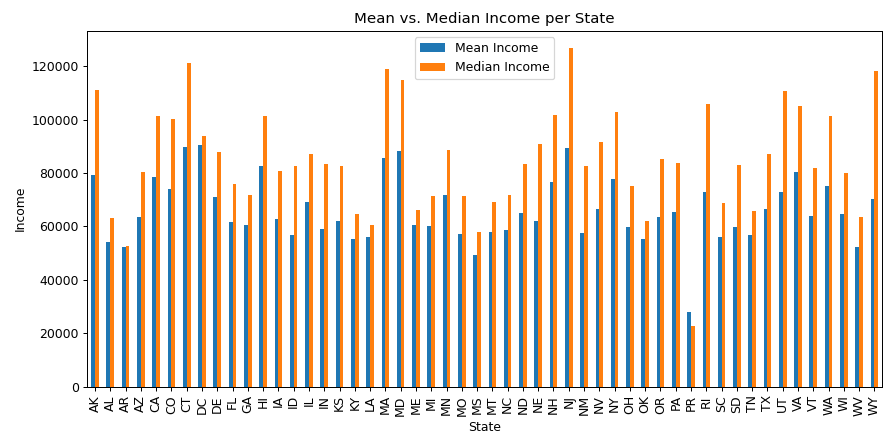

In [141]:
mean_summary_df.plot(kind='bar', figsize=(10,5), title="Mean vs. Median Income per State")
plt.xlabel("State")
plt.ylabel("Income")

plt.tight_layout()
plt.savefig("../Images/Income_comparison_State.png")



In [142]:
%matplotlib notebook

<IPython.core.display.Javascript object>


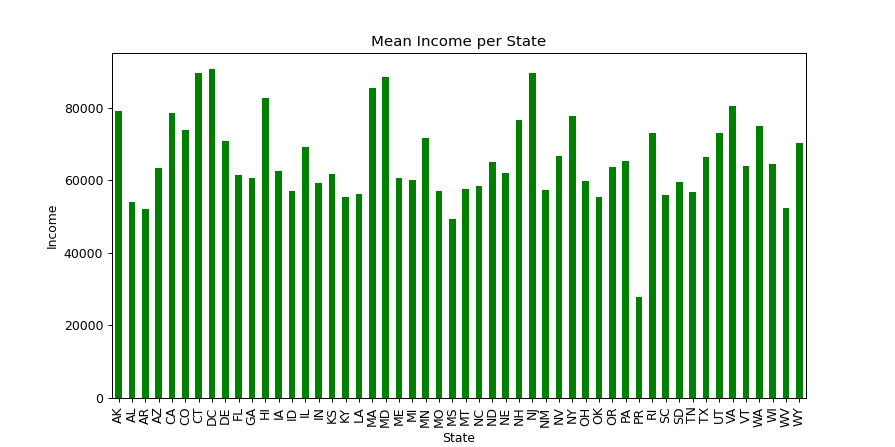

In [143]:
#Mean bar chart
mean_chart = mean_mean.plot(kind='bar', figsize=(10,5), color='green', title="Mean Income per State")

# Set the xlabel and ylabel using class methods
mean_chart.set_xlabel("State")
mean_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Mean_Income_State.png")

In [144]:
%matplotlib notebook

<IPython.core.display.Javascript object>


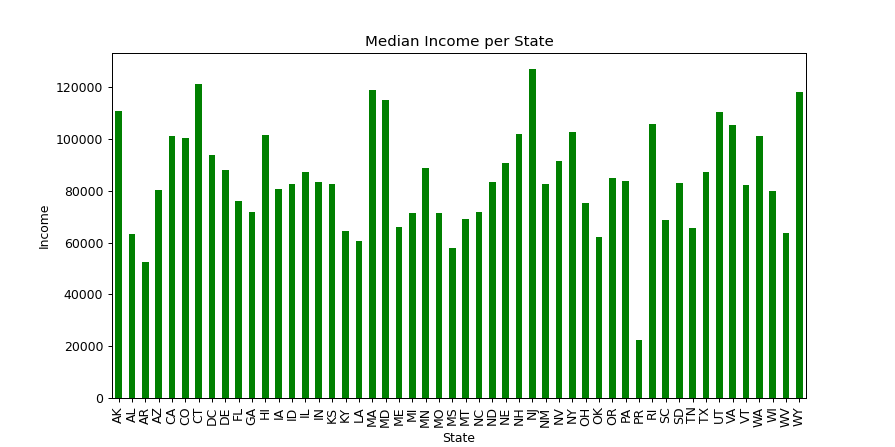

In [145]:
#Median bar chart
median_chart = mean_median.plot(kind='bar', figsize=(10,5), color='green', title="Median Income per State")

# Set the xlabel and ylabel using class methods
median_chart.set_xlabel("State")
median_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Median_Income_State.png")

# Group by NC Cities

In [146]:
NC_data = income_df.loc[income_df["State_ab"] == "NC", :]
NC_data.head()

,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
20801,NC,Alamance County,Elon,CDP,27244,36.193878,-79.506646,89973,300000,44245
20802,NC,Johnston County,Wendell,Town,27591,35.682169,-78.370658,67438,300000,38524
20803,NC,Sampson County,Stedman,Town,28391,34.996480,-78.641187,43538,25196,48097
20804,NC,Henderson County,Hendersonville,CDP,28792,35.308483,-82.441167,38120,31430,24810
20805,NC,Beaufort County,Pinetown,Town,27865,35.542961,-76.623111,30468,17951,32450


In [147]:
#Group by cities
city_group_df = NC_data.groupby(['City'])
city_group_df.head()

,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
20801,NC,Alamance County,Elon,CDP,27244,36.193878,-79.506646,89973,300000,44245
20802,NC,Johnston County,Wendell,Town,27591,35.682169,-78.370658,67438,300000,38524
20803,NC,Sampson County,Stedman,Town,28391,34.996480,-78.641187,43538,25196,48097
20804,NC,Henderson County,Hendersonville,CDP,28792,35.308483,-82.441167,38120,31430,24810
20805,NC,Beaufort County,Pinetown,Town,27865,35.542961,-76.623111,30468,17951,32450
...,...,...,...,...,...,...,...,...,...,...
21698,NC,Alamance County,Dunn,Track,28334,35.347598,-78.603441,42184,29462,39917
21699,NC,Alamance County,Angier,Track,27501,35.478482,-78.750110,63548,47054,53454
21700,NC,Alamance County,Olivia,Track,28368,35.363326,-79.042229,50021,37387,42265
21701,NC,Alamance County,Clyde,Track,28721,35.545566,-82.916135,45694,29938,40870


In [148]:
#Average of Mean and Median Incomes
City_mean_mean = city_group_df["Mean"].mean()
City_mean_median = city_group_df["Median"].mean()

#combine into new Dataframe
City_mean_summary_df = pd.DataFrame({
                                "Mean Income": City_mean_mean,
                                "Median Income": City_mean_median})

City_mean_summary_df.head()

,Mean Income,Median Income
City,,
Aberdeen,71839.000000,61786.0
Advance,96650.000000,60938.0
Ahoskie,51360.000000,41196.0
Albemarle,61027.666667,51923.0
Andrews,39213.000000,34122.0


In [192]:
#sort for highest average Mean income by Cities
City_mean_summary_sorted = City_mean_summary_df.sort_values("Mean Income", ascending=False)
City_mean_summary_sorted["Mean Income"]= City_mean_summary_sorted["Mean Income"].map("${:.2f}".format)
City_mean_summary_sorted["Median Income"]= City_mean_summary_sorted["Median Income"].map("${:.2f}".format)
City_mean_summary_sorted.head(6)

,Mean Income,Median Income
City,,
Davidson,$140057.00,$142838.00
Summerfield,$120146.00,$108197.00
Apex,$113786.50,$208028.00
Cary,$109838.14,$149078.93
Morrisville,$106140.00,$98872.00
Denver,$100443.33,$227776.67


In [193]:
#sort for highest average Median income by Cities
City_median_summary_sorted = City_mean_summary_df.sort_values("Median Income", ascending=False)
City_median_summary_sorted["Mean Income"]= City_median_summary_sorted["Mean Income"].map("${:.2f}".format)
City_median_summary_sorted["Median Income"]= City_median_summary_sorted["Median Income"].map("${:.2f}".format)
City_median_summary_sorted.head(6)

,Mean Income,Median Income
City,,
Elon,$89973.00,$300000.00
Cramerton,$69510.00,$300000.00
Rose Hill,$48716.00,$300000.00
Buxton,$35595.00,$300000.00
Snow Camp,$52843.00,$300000.00
Faison,$35652.00,$300000.00


In [194]:
%matplotlib notebook

<IPython.core.display.Javascript object>


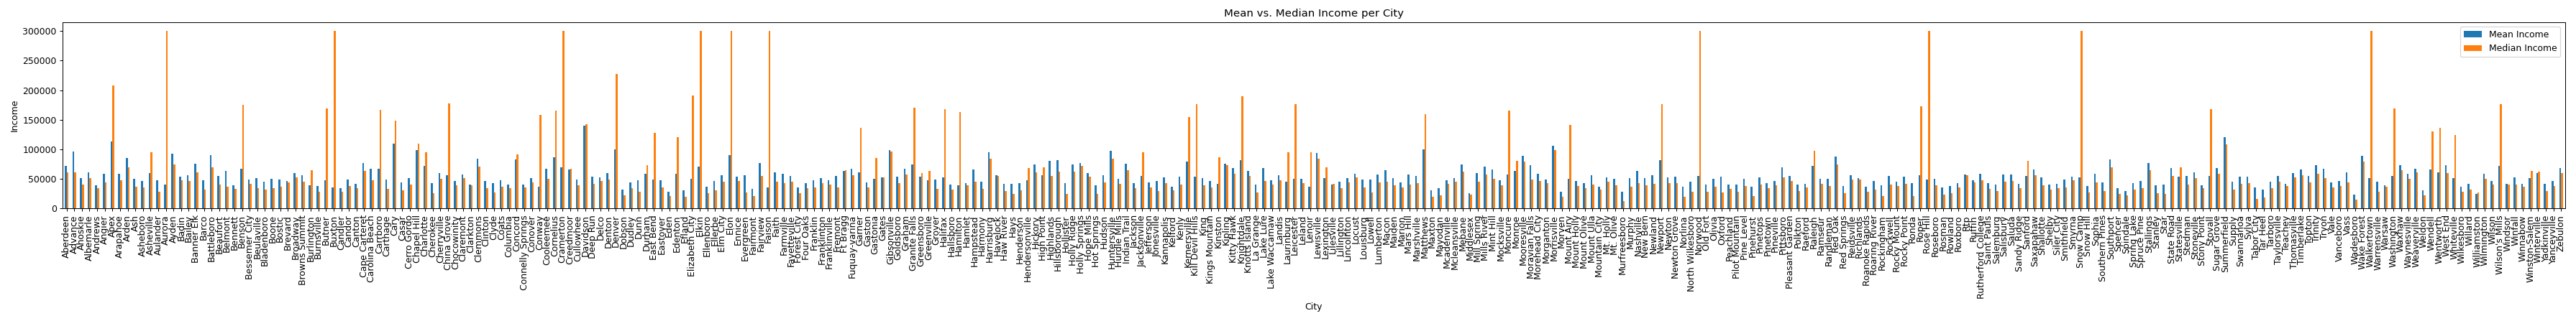

In [195]:
City_mean_summary_df.plot(kind='bar', figsize=(40,5), title="Mean vs. Median Income per City")
plt.xlabel("City")
plt.ylabel("Income")

plt.tight_layout()
plt.savefig("../Images/Income_comparison_City.png")



In [153]:
%matplotlib notebook

<IPython.core.display.Javascript object>


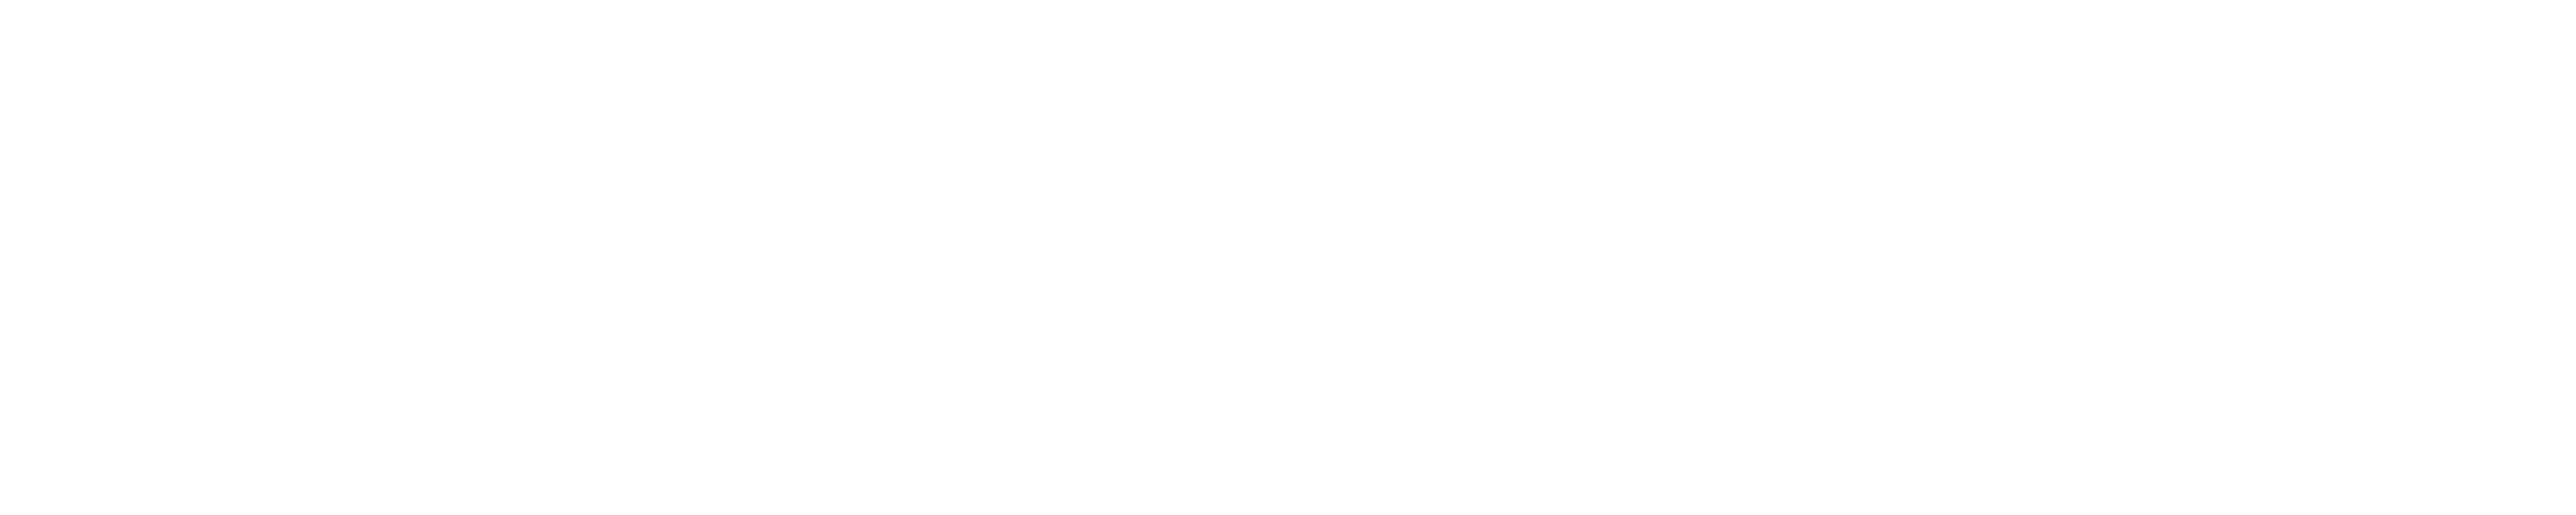

In [154]:
#Mean bar chart
City_mean_mean_chart = City_mean_mean.plot(kind='bar', figsize=(50,10), color='blue', title="Mean Income per City")

# Set the xlabel and ylabel using class methods
City_mean_mean_chart.set_xlabel("City")
City_mean_mean_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Mean_Income_City.png")

In [155]:
%matplotlib notebook

<IPython.core.display.Javascript object>


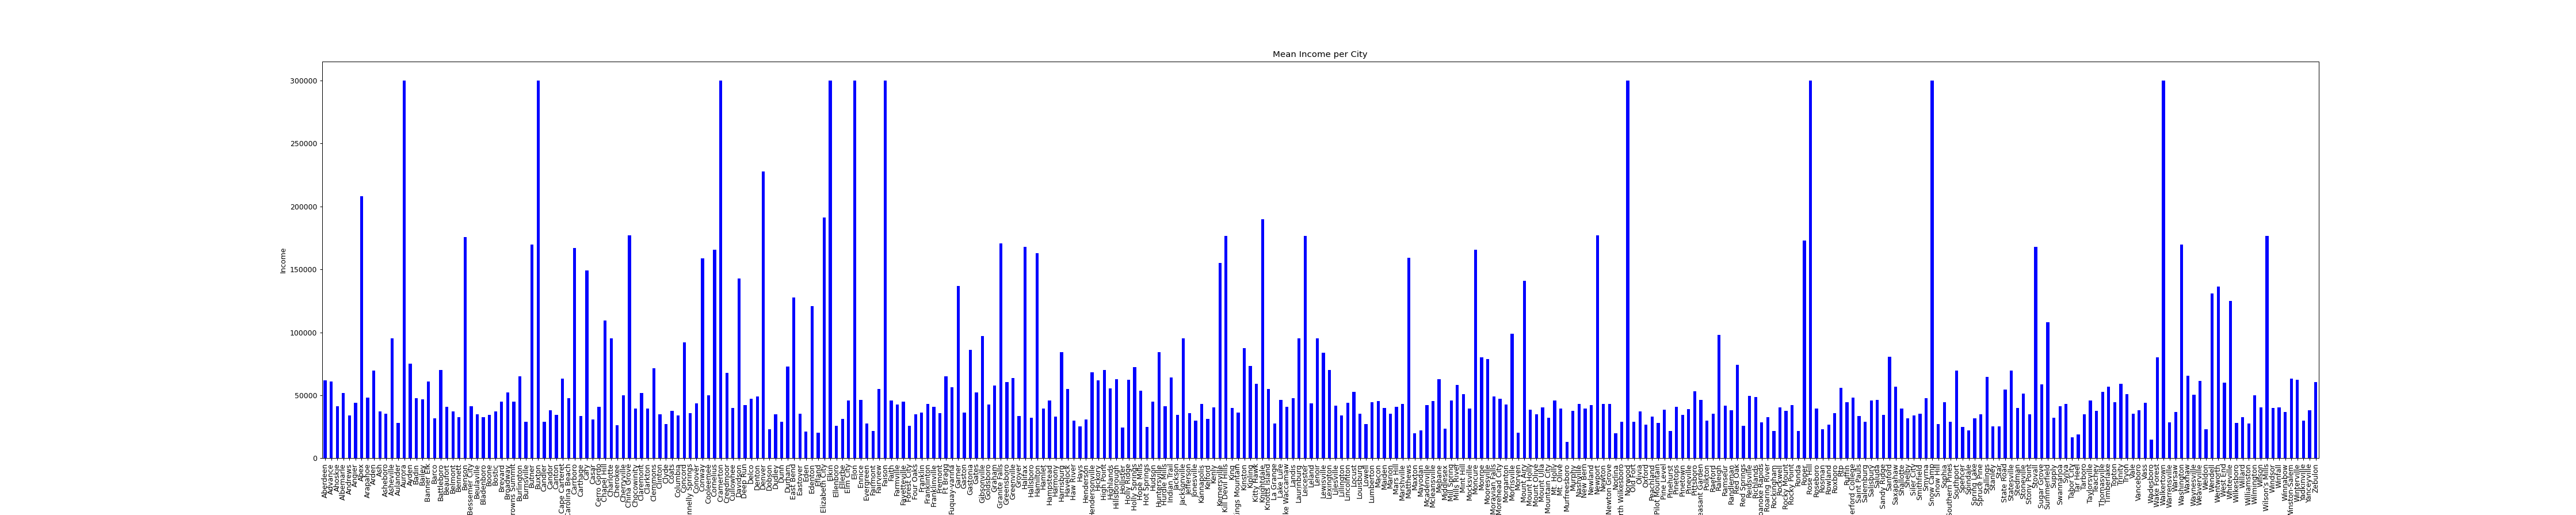

In [156]:
#Median bar chart
City_mean_median_chart = City_mean_median.plot(kind='bar', figsize=(50,10), color='blue', title="Mean Income per City")

# Set the xlabel and ylabel using class methods
City_mean_median_chart.set_xlabel("City")
City_mean_median_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Median_Income_City.png")

# Group by  NC Zip

In [157]:
NC_data = income_df.loc[income_df["State_ab"] == "NC", :]
NC_data.head()

,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
20801,NC,Alamance County,Elon,CDP,27244,36.193878,-79.506646,89973,300000,44245
20802,NC,Johnston County,Wendell,Town,27591,35.682169,-78.370658,67438,300000,38524
20803,NC,Sampson County,Stedman,Town,28391,34.996480,-78.641187,43538,25196,48097
20804,NC,Henderson County,Hendersonville,CDP,28792,35.308483,-82.441167,38120,31430,24810
20805,NC,Beaufort County,Pinetown,Town,27865,35.542961,-76.623111,30468,17951,32450


In [158]:
#Group by Zip Code
Zip_group_df = NC_data.groupby(['Zip_Code'])
Zip_group_df.head()



,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
20801,NC,Alamance County,Elon,CDP,27244,36.193878,-79.506646,89973,300000,44245
20802,NC,Johnston County,Wendell,Town,27591,35.682169,-78.370658,67438,300000,38524
20803,NC,Sampson County,Stedman,Town,28391,34.996480,-78.641187,43538,25196,48097
20804,NC,Henderson County,Hendersonville,CDP,28792,35.308483,-82.441167,38120,31430,24810
20805,NC,Beaufort County,Pinetown,Town,27865,35.542961,-76.623111,30468,17951,32450
...,...,...,...,...,...,...,...,...,...,...
21698,NC,Alamance County,Dunn,Track,28334,35.347598,-78.603441,42184,29462,39917
21699,NC,Alamance County,Angier,Track,27501,35.478482,-78.750110,63548,47054,53454
21700,NC,Alamance County,Olivia,Track,28368,35.363326,-79.042229,50021,37387,42265
21701,NC,Alamance County,Clyde,Track,28721,35.545566,-82.916135,45694,29938,40870


In [159]:
#Average of Mean and Median Incomes
Zip_mean_mean = Zip_group_df["Mean"].mean()
Zip_mean_median = Zip_group_df["Median"].mean()

#combine into new Dataframe
Zip_mean_summary_df = pd.DataFrame({
                                "Mean Income": Zip_mean_mean,
                                "Median Income": Zip_mean_median})

Zip_mean_summary_df.head()

,Mean Income,Median Income
Zip_Code,,
27006,96650.000000,60938.00
27012,84668.250000,71534.25
27014,66831.000000,50242.00
27017,32108.000000,22956.00
27018,49589.333333,127604.00


In [160]:
#sort for highest average Mean income by Zip
Zip_mean_summary_sorted = Zip_mean_summary_df.sort_values("Mean Income", ascending=False)
Zip_mean_summary_sorted["Mean Income"]= Zip_mean_summary_sorted["Mean Income"].map("${:.2f}".format)
Zip_mean_summary_sorted["Median Income"]= Zip_mean_summary_sorted["Median Income"].map("${:.2f}".format)
Zip_mean_summary_sorted.head(6)

,Mean Income,Median Income
Zip_Code,,
28207,$187131.00,$211829.00
27608,$141168.00,$300000.00
28036,$140057.00,$142838.00
27519,$139580.25,$219159.50
27409,$137903.00,$131232.00
28226,$131693.00,$118927.00


In [161]:
#sort for highest average Median income by Zip
Zip_median_summary_sorted = Zip_mean_summary_df.sort_values("Median Income", ascending=False)
Zip_median_summary_sorted["Mean Income"]= Zip_median_summary_sorted["Mean Income"].map("${:.2f}".format)
Zip_median_summary_sorted["Median Income"]= Zip_median_summary_sorted["Median Income"].map("${:.2f}".format)
Zip_median_summary_sorted.head(6)

,Mean Income,Median Income
Zip_Code,,
28204,$129689.00,$300000.00
27920,$35595.00,$300000.00
27244,$89973.00,$300000.00
27889,$52154.00,$300000.00
28458,$48716.00,$300000.00
28621,$71109.00,$300000.00


In [162]:
%matplotlib notebook

<IPython.core.display.Javascript object>


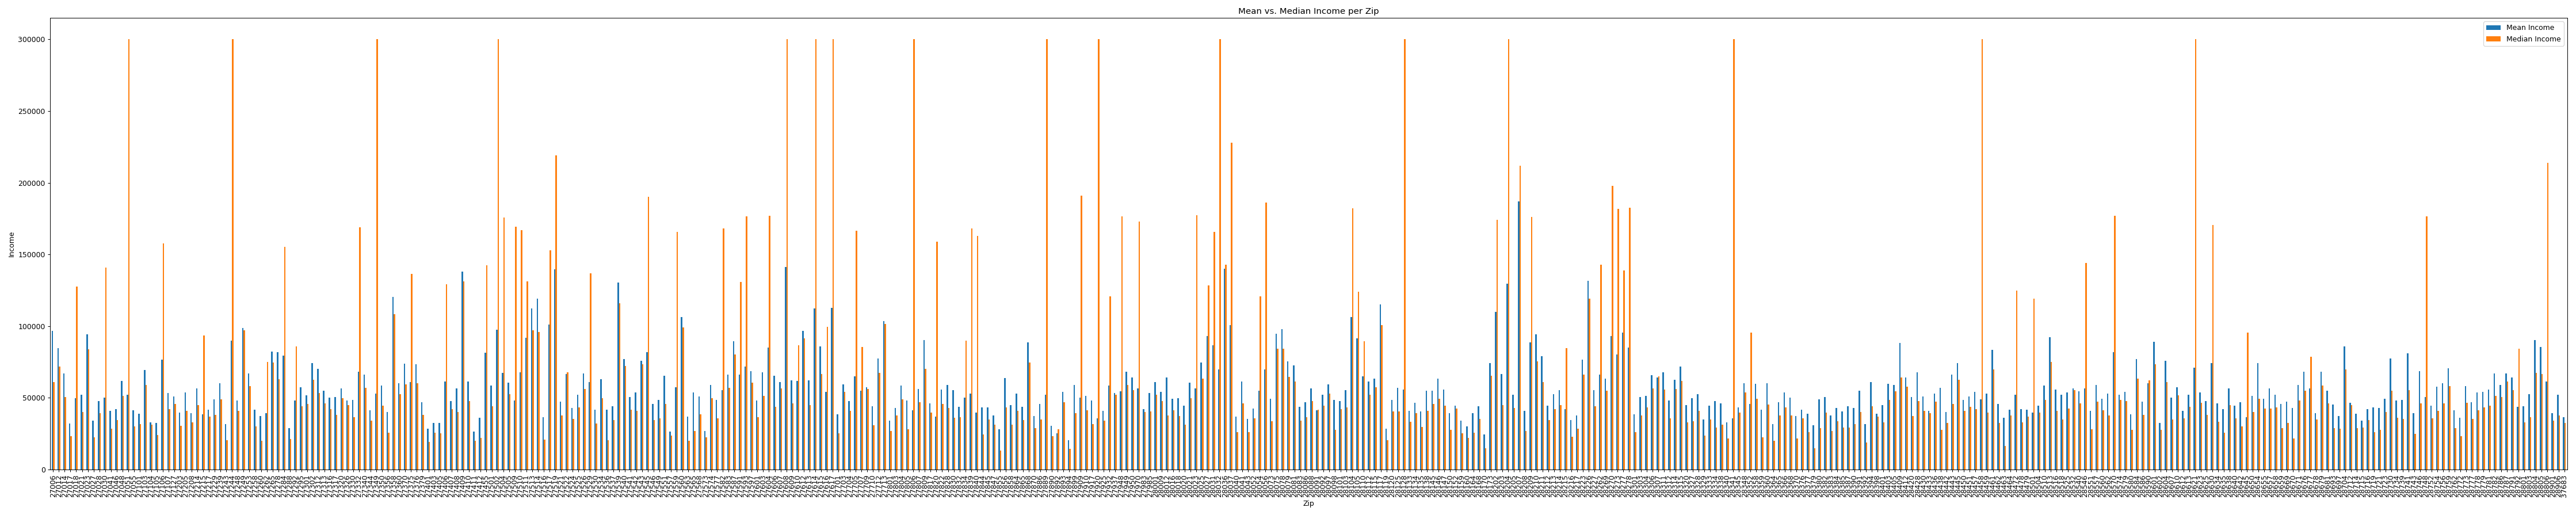

In [163]:
Zip_mean_summary_df.plot(kind='bar', figsize=(50,10), title="Mean vs. Median Income per Zip")
plt.xlabel("Zip")
plt.ylabel("Income")

plt.tight_layout()
plt.savefig("../Images/Income_comparison_Zip.png")


In [186]:
%matplotlib notebook

<IPython.core.display.Javascript object>


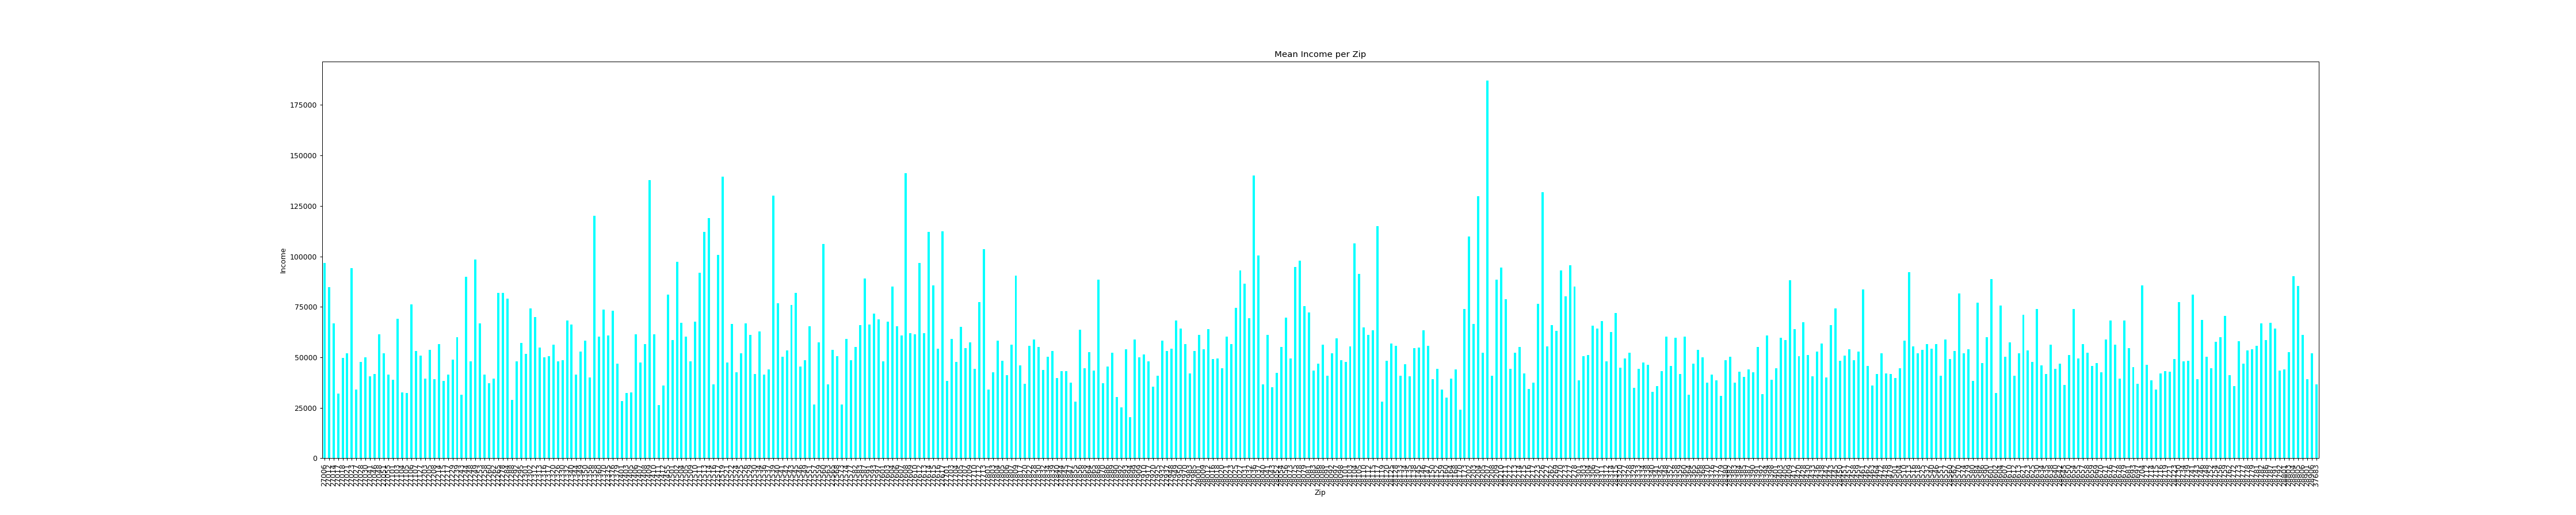

In [187]:
#Mean bar chart
Zip_mean_mean_chart = Zip_mean_mean.plot(kind='bar', figsize=(50,10), color='cyan', title="Mean Income per Zip")

# Set the xlabel and ylabel using class methods
Zip_mean_mean_chart.set_xlabel("Zip")
Zip_mean_mean_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Mean_Income_Zip.png")

In [190]:
%matplotlib notebook

<IPython.core.display.Javascript object>


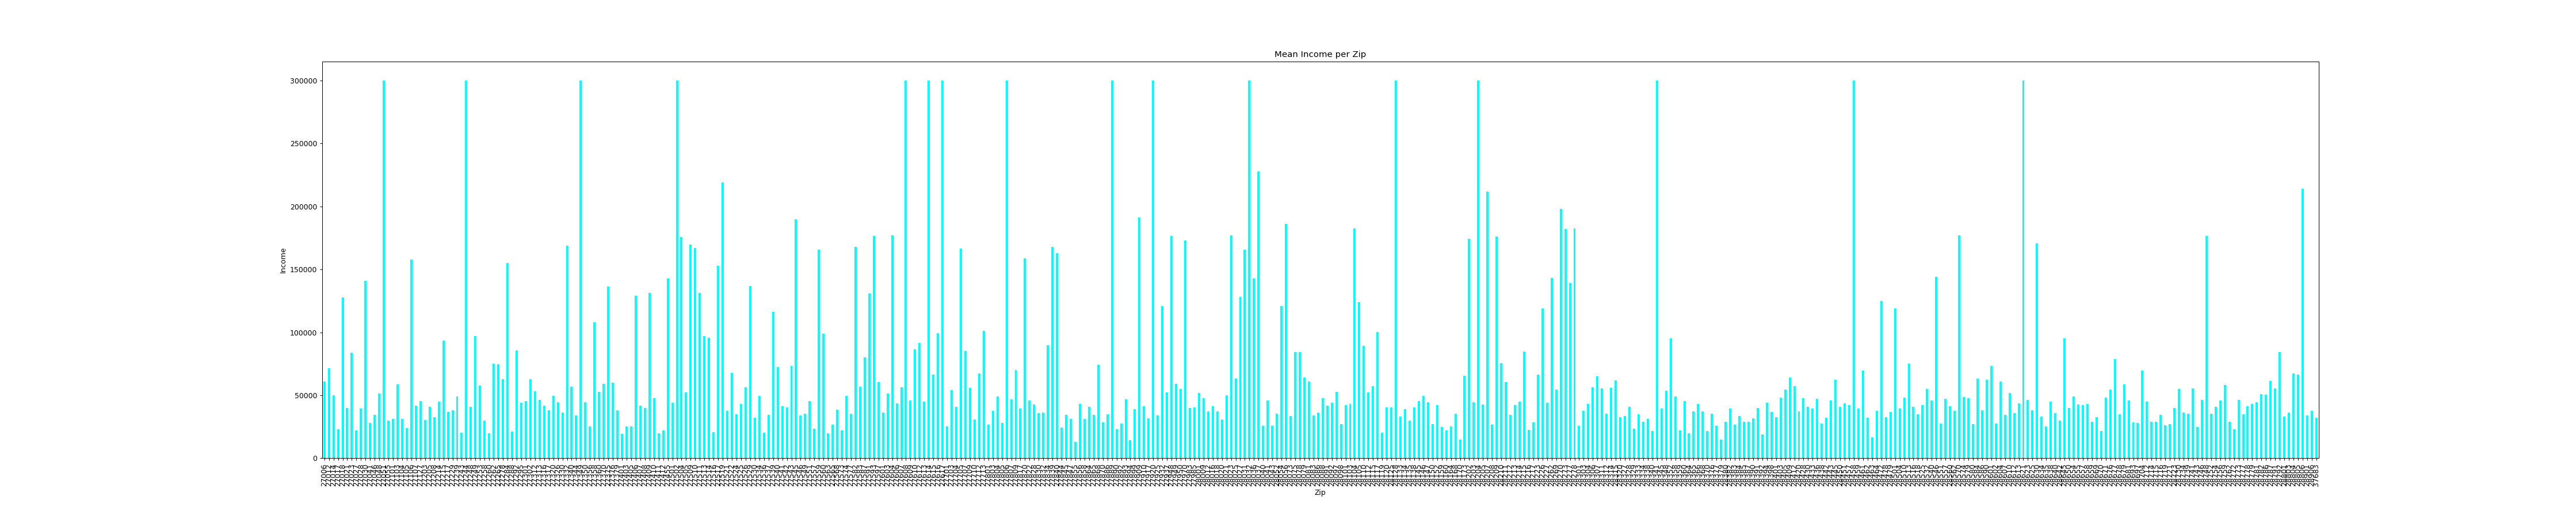

In [191]:
#Median bar chart
Zip_mean_median_chart = Zip_mean_median.plot(kind='bar', figsize=(50,10), color='cyan', title="Mean Income per Zip")

# Set the xlabel and ylabel using class methods
Zip_mean_median_chart.set_xlabel("Zip")
Zip_mean_median_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Median_Income_Zip.png")

# Group by NC County

In [168]:
income_df.head()

,State_ab,County,City,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev
0,AL,Mobile County,Chickasaw,City,36611,30.771450,-88.079697,38773,30506,33101
1,AL,Barbour County,Louisville,City,36048,31.708516,-85.611039,37725,19528,43789
2,AL,Shelby County,Columbiana,City,35051,33.191452,-86.615618,54606,31930,57348
3,AL,Mobile County,Satsuma,City,36572,30.874343,-88.009442,63919,52814,47707
4,AL,Mobile County,Dauphin Island,Town,36528,30.250913,-88.171268,77948,67225,54270


In [169]:
#Use Trumane's code+file to merge files to get correct counties
starbucks_county = pd.read_csv("AllStarbucksandCountyData.csv")
starbucks_county.head()


,Street Address,County Name,City,Store Name,State,Zip_Code,Ownership Type
0,110 Columbus Drive,MOORE,ABERDEEN,"Aberdeen, NC",NC,28315,Company Owned
1,750 W Williams St,WAKE,APEX,Harris Teeter-Apex #58,NC,27502,Licensed
2,1201 Beaver Creek Commons Dr,WAKE,APEX,Super Target Apex ST-1932,NC,27502,Licensed
3,940 US Hwy 64,WAKE,APEX,Kroger-Apex #357,NC,27523,Licensed
4,15 McKenna Rd,BUNCOMBE,ARDEN,Target Asheville T-2011,NC,28704,Licensed


In [170]:
merge_df = pd.merge(income_df, starbucks_county, on="Zip_Code", how="inner")
merge_df

,State_ab,County,City_x,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev,Street Address,County Name,City_y,Store Name,State,Ownership Type
0,NC,Alamance County,Elon,CDP,27244,36.193878,-79.506646,89973,300000,44245,NaN,ALAMANCE,ELON,NaN,NC,NaN
1,NC,Johnston County,Wendell,Town,27591,35.682169,-78.370658,67438,300000,38524,NaN,WAKE,WENDELL,NaN,NC,NaN
2,NC,Alamance County,Wendell,Track,27591,35.681373,-78.380455,77592,52200,60944,NaN,WAKE,WENDELL,NaN,NC,NaN
3,NC,Alamance County,Wendell,Track,27591,35.837001,-78.411718,53544,40163,46957,NaN,WAKE,WENDELL,NaN,NC,NaN
4,NC,Sampson County,Stedman,Town,28391,34.996480,-78.641187,43538,25196,48097,NaN,CUMBERLAND,STEDMAN,NaN,NC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,NC,Alamance County,Wilson,Track,27894,35.761378,-77.915074,20447,14177,14812,NaN,WILSON,WILSON,NaN,NC,NaN
1508,NC,Alamance County,Elm City,Track,27822,35.730319,-77.803815,55806,45816,48450,NaN,WILSON,ELM CITY,NaN,NC,NaN
1509,NC,Alamance County,Jonesville,Track,28642,36.170697,-80.855702,46944,30035,44787,NaN,YADKIN,JONESVILLE,NaN,NC,NaN
1510,NC,Alamance County,Pleasant Garden,Track,27313,35.985521,-79.770913,54916,46183,45363,NaN,GUILFORD,PLEASANT GARDEN,NaN,NC,NaN


In [171]:
result_df = merge_df.drop_duplicates(["Store Name"], keep='last')
result_df

,State_ab,County,City_x,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev,Street Address,County Name,City_y,Store Name,State,Ownership Type
18,NC,Alamance County,Hendersonville,Track,28792,35.300969,-82.446080,39611,31302,34698,1980 Asheville Hwy,HENDERSON,HENDERSONVILLE,Ingles-Hendersonville #11,NC,Licensed
19,NC,Alamance County,Hendersonville,Track,28792,35.300969,-82.446080,39611,31302,34698,3643 Howard Gap Rd,HENDERSON,HENDERSONVILLE,Ingles-Hendersonville #179,NC,Licensed
20,NC,Alamance County,Hendersonville,Track,28792,35.300969,-82.446080,39611,31302,34698,103 Mitchelle Drive,HENDERSON,HENDERSONVILLE,Four Seasons Boulevard & I-26,NC,Company Owned
28,NC,Alamance County,Clemmons,Track,27012,36.058022,-80.383390,76852,71980,49846,2785 Lewisville-Clemmons Rd,FORSYTH,CLEMMONS,Clemmons,NC,Company Owned
45,NC,Alamance County,Burlington,Track,27215,36.079157,-79.427579,18497,11837,20464,2727 S Church St,ALAMANCE,BURLINGTON,Harris Teeter-Burlington # 345,NC,Licensed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,NC,Alamance County,Raleigh,Track,27614,35.911090,-78.566970,63939,300000,50442,"10760 Wakefield Commons Dr., Ste. 109, New Ber...",WAKE,RALEIGH,Wakefield Commons,NC,Company Owned
1494,NC,Alamance County,Raleigh,Track,27617,35.870183,-78.783090,112500,300000,9129,"7854 Alexander Promenade Pl., Bldg. H, Ste. 1,...",WAKE,RALEIGH,Alexander Place,NC,Company Owned
1499,NC,Alamance County,Boone,Track,28607,36.251413,-81.565480,61854,45851,47980,240 Shadowline Dr,WATAUGA,BOONE,Harris Teeter-Boone #165,NC,Licensed
1505,NC,Alamance County,Greensboro,Track,27411,36.077880,-79.769196,26290,19772,23689,1601 E Market St,GUILFORD,GREENSBORO,North Carolina A & T State Univ,NC,Licensed


In [213]:
#Group by counties
county_group_df = merge_df.groupby(['County Name'])
county_group_df.head()

,State_ab,County,City_x,Type,Zip_Code,Lat,Lon,Mean,Median,Stdev,Street Address,County Name,City_y,Store Name,State,Ownership Type
0,NC,Alamance County,Elon,CDP,27244,36.193878,-79.506646,89973,300000,44245,NaN,ALAMANCE,ELON,NaN,NC,NaN
1,NC,Johnston County,Wendell,Town,27591,35.682169,-78.370658,67438,300000,38524,NaN,WAKE,WENDELL,NaN,NC,NaN
2,NC,Alamance County,Wendell,Track,27591,35.681373,-78.380455,77592,52200,60944,NaN,WAKE,WENDELL,NaN,NC,NaN
3,NC,Alamance County,Wendell,Track,27591,35.837001,-78.411718,53544,40163,46957,NaN,WAKE,WENDELL,NaN,NC,NaN
4,NC,Sampson County,Stedman,Town,28391,34.996480,-78.641187,43538,25196,48097,NaN,CUMBERLAND,STEDMAN,NaN,NC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,NC,Alamance County,Roper,Track,27970,35.915993,-76.517464,59243,300000,32746,NaN,WASHINGTON,ROPER,NaN,NC,NaN
1497,NC,Alamance County,Roper,Track,27970,35.763933,-76.567742,54005,45845,35261,NaN,WASHINGTON,ROPER,NaN,NC,NaN
1498,NC,Alamance County,Boone,Track,28607,36.248395,-81.698933,38451,23533,46393,240 Shadowline Dr,WATAUGA,BOONE,Harris Teeter-Boone #165,NC,Licensed
1499,NC,Alamance County,Boone,Track,28607,36.251413,-81.565480,61854,45851,47980,240 Shadowline Dr,WATAUGA,BOONE,Harris Teeter-Boone #165,NC,Licensed


In [214]:
#Average of Mean and Median Incomes
county_mean_mean = county_group_df["Mean"].mean()
county_mean_median = county_group_df["Median"].mean()

#combine into new Dataframe
county_mean_summary_df = pd.DataFrame({
                                "Mean Income": county_mean_mean,
                                "Median Income": county_mean_median})

county_mean_summary_df.head()

,Mean Income,Median Income
County Name,,
ALAMANCE,48113.766667,89436.566667
ALEXANDER,47015.000000,40480.500000
ALLEGHANY,53459.500000,46285.500000
ANSON,34969.600000,27877.600000
ASHE,44551.333333,33292.000000


In [215]:
#sort for highest average Mean income by county
county_mean_summary_sorted = county_mean_summary_df.sort_values("Mean Income", ascending=False)
county_mean_summary_sorted["Mean Income"]= county_mean_summary_sorted["Mean Income"].map("${:.2f}".format)
county_mean_summary_sorted["Median Income"]= county_mean_summary_sorted["Median Income"].map("${:.2f}".format)
county_mean_summary_sorted.head(6)

,Mean Income,Median Income
County Name,,
ORANGE,$102102.78,$105691.56
WAKE,$87685.37,$119555.31
IREDELL,$87574.36,$83530.29
CABARRUS,$87333.05,$111437.41
MECKLENBURG,$80794.69,$110220.10
UNION,$73151.74,$91506.48


In [216]:
#sort for highest average Median income by Zip
county_median_summary_sorted = county_mean_summary_df.sort_values("Median Income", ascending=False)
county_median_summary_sorted["Mean Income"]= county_mean_summary_df["Mean Income"].map("${:.2f}".format)
county_median_summary_sorted["Median Income"]= county_mean_summary_df["Median Income"].map("${:.2f}".format)
county_median_summary_sorted.head(6)

,Mean Income,Median Income
County Name,,
PASQUOTANK,$49910.80,$191036.60
DARE,$53098.25,$178002.50
WASHINGTON,$56624.00,$172922.50
DUPLIN,$43358.80,$141870.40
GRANVILLE,$54458.00,$128256.17
SURRY,$51330.22,$123384.56


In [217]:
%matplotlib notebook

<IPython.core.display.Javascript object>


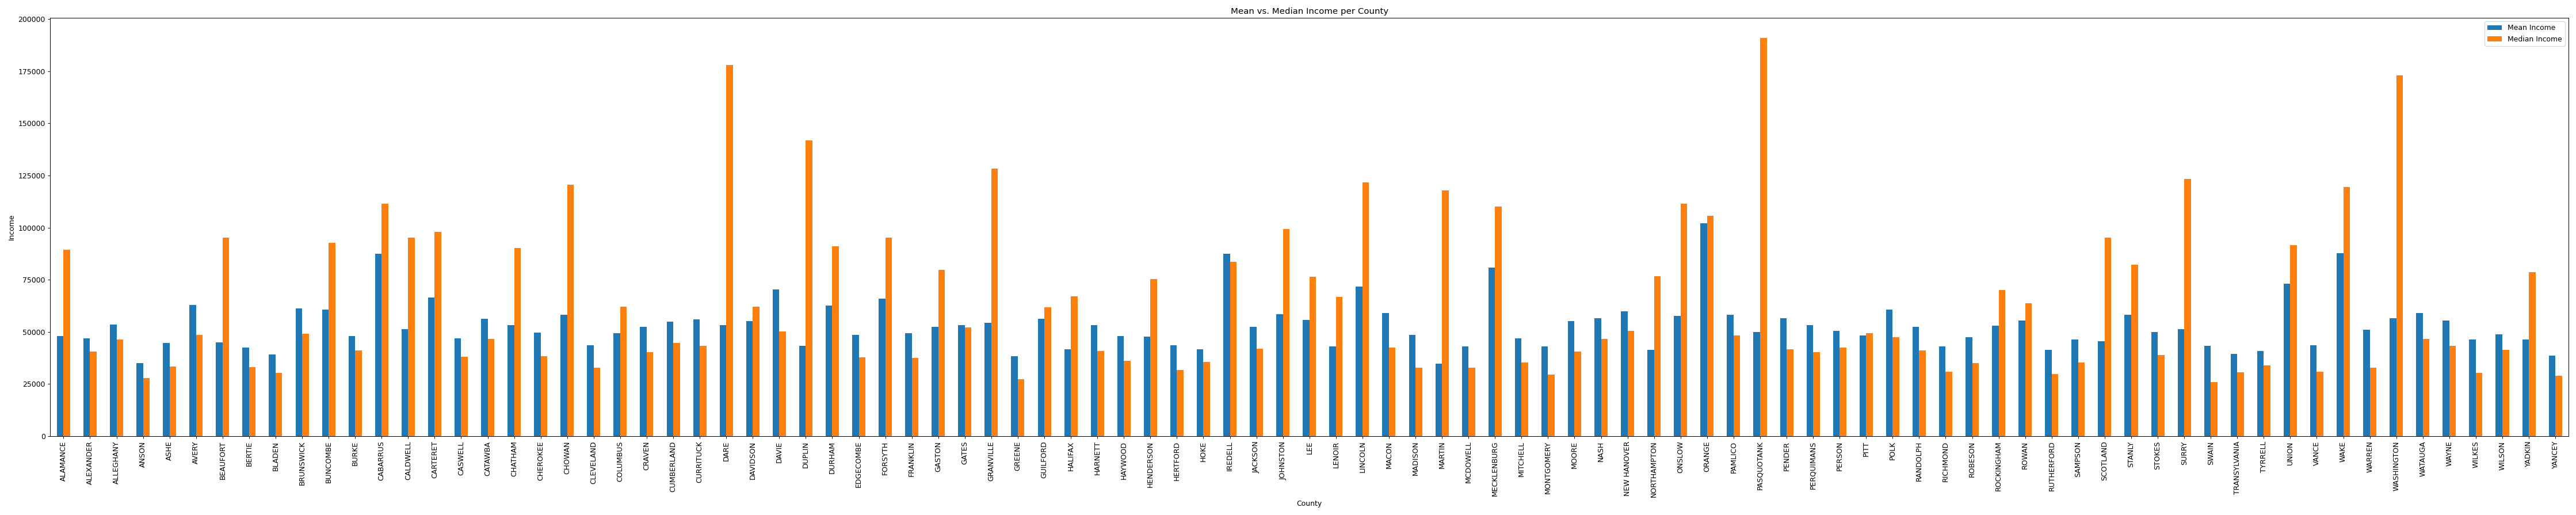

In [219]:
county_mean_summary_df.plot(kind='bar', figsize=(50,10), title="Mean vs. Median Income per County")
plt.xlabel("County")
plt.ylabel("Income")

plt.tight_layout()
plt.savefig("../Images/Income_comparison_county.png")


In [226]:
%matplotlib notebook

<IPython.core.display.Javascript object>


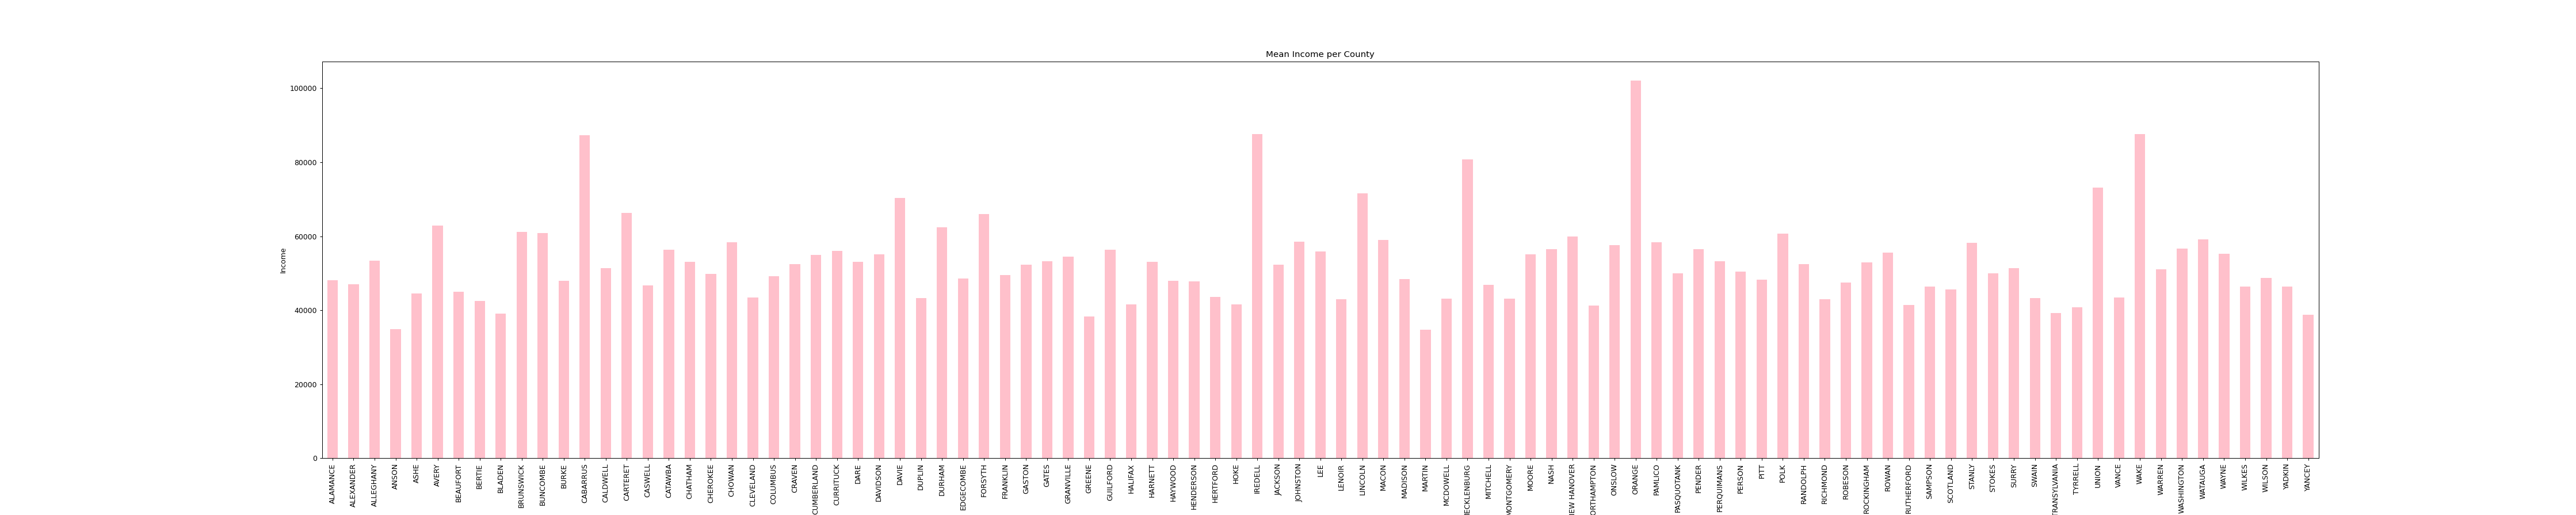

In [227]:
#Mean bar chart
county_mean_mean_chart = county_mean_mean.plot(kind='bar', figsize=(50,10), color='pink', title="Mean Income per County")

# Set the xlabel and ylabel using class methods
county_mean_mean_chart.set_xlabel("County")
county_mean_mean_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Mean_Income_county.png")

In [228]:
%matplotlib notebook

<IPython.core.display.Javascript object>


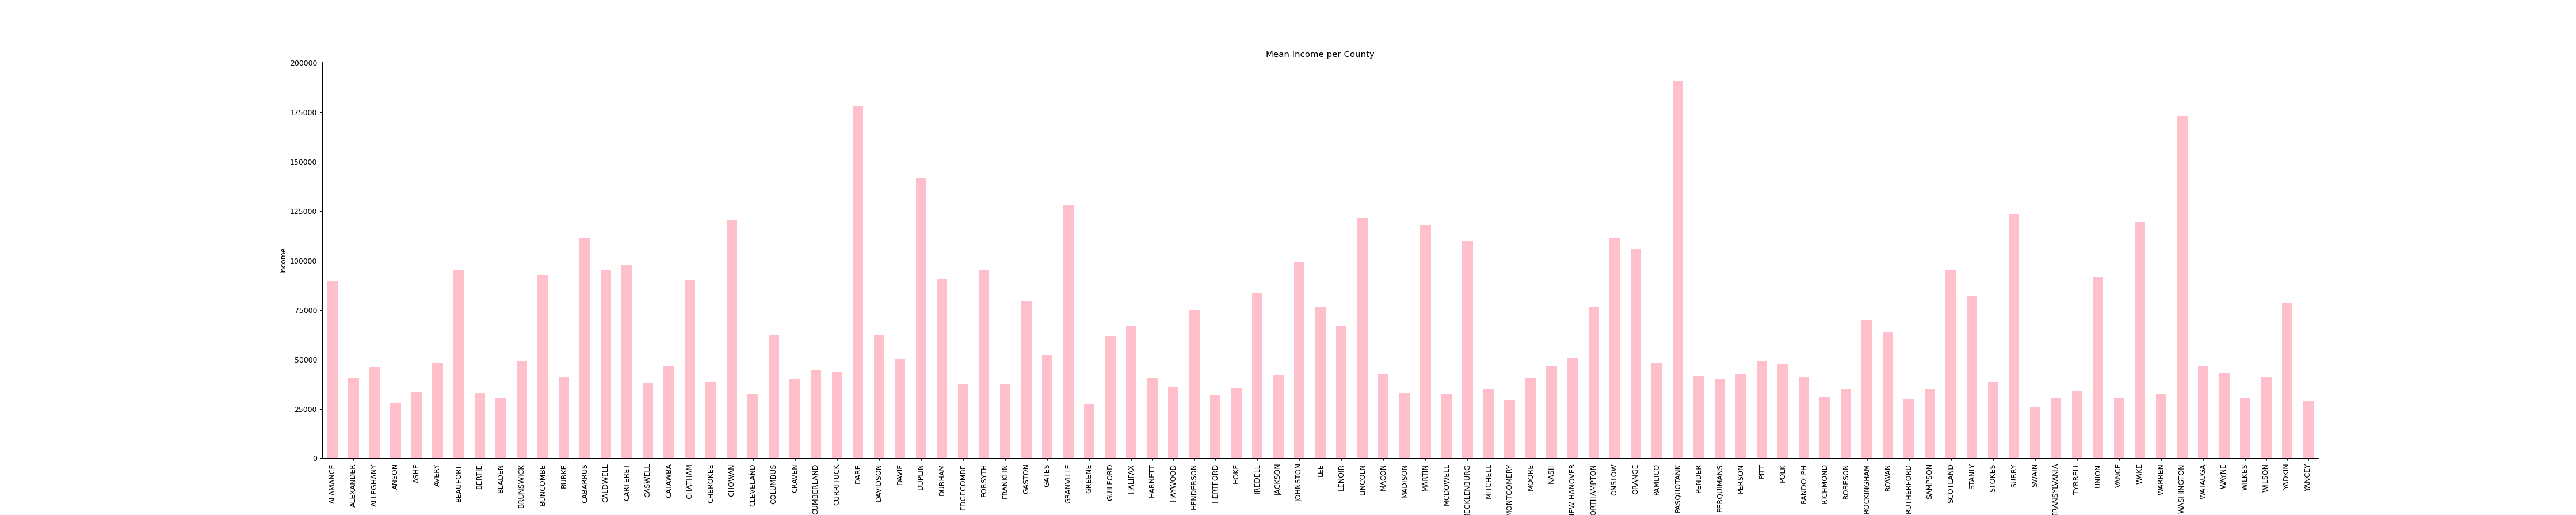

In [229]:
#Median bar chart
county_mean_median_chart = county_mean_median.plot(kind='bar', figsize=(50,10), color='pink', title="Mean Income per County")

# Set the xlabel and ylabel using class methods
county_mean_median_chart.set_xlabel("Zip")
county_mean_median_chart.set_ylabel("Income")

plt.show()
#save image
plt.savefig("../Images/Median_Income_county.png")